[[ 1.14  -0.114]
 [-1.52  -1.15 ]
 [-1.05   0.72 ]
 ...
 [ 2.64   1.14 ]
 [ 0.769  0.772]
 [-0.255 -0.142]]
[0 1 0 ... 1 0 1]


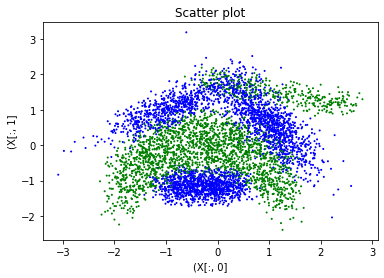

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('banana.csv')
X=data.iloc[:,0:2].values
y=data.iloc[:,-1].values
print(X)
for i in range(len(y)):
    if y[i]==-1:
        y[i]=0
print(y)
colors = np.array([x for x in "bgrcmyk"])
plt.scatter(X[:, 0], X[:, 1], color=colors[list(y)].tolist(), s=1) 
plt.title('Scatter plot')
plt.xlabel('(X[:, 0]')
plt.ylabel('(X[:, 1]')
plt.show()

In [9]:
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter=5000,tol=None, random_state=0)
clf

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=5000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
clf.fit(X, y)
clf.score(X, y)

0.5313207547169811

In [14]:
print(y)

[0 1 0 ... 1 0 1]


In [16]:
y_pred = clf.predict(X)
print(y_pred)

[0 1 0 ... 0 0 0]


In [17]:
w0=clf.coef_[0][0]
w1=clf.coef_[0][1]
print("w0 = ", clf.coef_[0][0])
print("w1 = ", clf.coef_[0][1])

w0 =  -0.6460570000002598
w1 =  -0.7171496000088777


In [18]:
import matplotlib.lines as mlines

def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

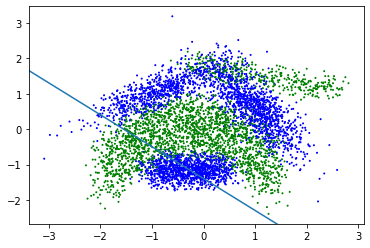

In [26]:
colors = np.array([x for x in "bgrcmyk"])
plt.scatter(X[:, 0], X[:, 1], color=colors[list(y)].tolist(), s=1) 
p1 = [0,-(clf.intercept_[0]/clf.coef_[0][1])];
p2 = [-(clf.intercept_[0]/clf.coef_[0][0]),0];

newline(p1,p2)
plt.show();

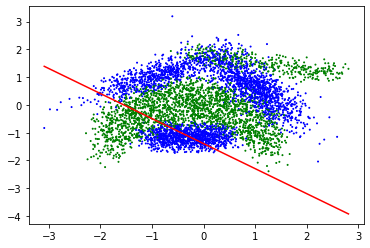

In [31]:
plt.scatter(X[:, 0], X[:, 1], color=colors[list(y)].tolist(), s=1) 
ymax=max(X[:,0])
ymin=min(X[:,0])
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'r-')